# Large assignment 2

## Read before you start

* Provide clear and complete answers in code blocks or markdown. You may add as many as you need.
* Always motivate your answers. This can be done in markdown cells, or in comments in code.
* Submit your results via Brightspace. Use the following filename convention: ``StudentName1_snumber1_StudentName2_snumber2_LargeAssignment2.ipynb``.
* Make sure you submit a fully executed version of the notebook file. The teaching assistants will not run/debug your code during grading.
* Questions? Ask them during the workgroups, or see Brightspace for instructions on how to proceed.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pyjags as pj

print('Using PyJAGS v{:s}'.format(pj.__version__))

plt.rc('axes', titlesize=18)        # fontsize of the axes title
plt.rc('axes', labelsize=18)        # fontsize of the x and y labels
plt.rc('xtick', labelsize=14)       # fontsize of the tick labels
plt.rc('ytick', labelsize=14)       # fontsize of the tick labels
plt.rc('legend', fontsize=12)       # legend fontsize
plt.rc('figure', titlesize=30)      # fontsize of the figure title

Using PyJAGS v1.3.8


# 1. Dentistry

## 1.1 The pilot study

The company DentoCare has developed a new toothbrush, the 'Dentinator 2000'. The toothbrush is first being introduced in France. After DentoCare has introduced the toothbrush to the market, they polled a number of French dentists and asked whether they prefer the Dentinator 2000 or its predecessor, the 'Dentinator Pro'.

The results from the poll are that out of $N_F=238$ French dentists, $z_F=187$ say they recommend the new toothbrush. 

DentoCare assumes that, if the Dentinator is performing equal to its predecessor, the recommendations would be 50/50 in favor or against the new toothbrush. To test whether the dentists really prefer the new toothbrush, DentoCare performs Bayesian model comparison.

They define two models, $m_1$, in which there is a preference, and $m_0$ in which the recommendations are pretty much 50/50. In both models, the company uses a binomial likelihood:

$$
    p(z=k \mid N, \theta) = \binom{N}{z} \theta^z (1-\theta)^{N-z} \enspace.
$$

For the null model, DentoCare uses a spike distribution with $c=0.5$:

$$
    p(\theta \mid c) = \text{spike}(\theta \mid c) = \begin{cases}1 & \text{if $\theta=c$,} \\ 0 & \text{otherwise}\end{cases} \enspace,
$$ as the prior.

For the alternative model, they use our familiar beta distribution as a prior instead:

$$
    p(\theta \mid a, b) = \frac{1}{B(a,b)} \theta^{a-1} (1-\theta)^{b-1} \enspace.
$$

In this setting, the Bayes factor $BF_{10}$ can be computed exactly, because of the chosen priors. To compute $BF_{10}$, we need the marginal likelihoods of both models.

1. Derive the expression for the marginal likelihood of $m_1$, $p(z \mid N, m_1)$, in terms of $a, b, z, N$.

_ANSWER:_ 
$$
\begin{aligned}
p(z\mid N,m_1)
&= \int_{0}^{1}p(z\mid N,\theta)\,p(\theta\mid a,b)\,\mathrm d\theta \\[6pt]
&= \int_{0}^{1}
   \binom{N}{z}\,\theta^{z}(1-\theta)^{N-z}
   \;\frac{1}{B(a,b)}\,\theta^{a-1}(1-\theta)^{b-1}
   \,\mathrm d\theta \\[6pt]
&= \binom{N}{z}\,\frac{1}{B(a,b)}
  \int_{0}^{1}
    \theta^{\,z+a-1}\,(1-\theta)^{\,N-z+b-1}
  \,\mathrm d\theta \\[6pt]
&= \binom{N}{z}\,\frac{B\bigl(z+a,\;N-z+b\bigr)}{B(a,b)}.
\end{aligned}
$$



2. Similarly, derive the expression for the marginal likelihood of $m_0$, $p(z \mid N, m_0)$ in terms of $c, z, N$.

_ANSWER:_

$$
\begin{aligned}
p(z\mid N,m_0)
&= \int_{0}^{1}p(z\mid N,\theta)\,p(\theta\mid c)\,\mathrm d\theta \\[6pt]
&= \int_{0}^{1}
   \binom{N}{z}\,\theta^{z}(1-\theta)^{N-z}
   \;\text{spike}(\theta|c)
   \,\mathrm d\theta \\[6pt]
&= \binom{N}{z}\,c^{z}(1-c)^{N-z}
\end{aligned}
$$




__Practical note:__

You are almost ready to compute the Bayes factor. However, there is one important caveat: some terms in the marginal likelihood can result in numerical issues. For example $\binom{238}{187}\approx 3.19 \times 10^{52}$, and when working with such huge numbers, we might run into numerical under- and overflow. In practice, we therefore often compute the _log_ marginal likelihoods and _log_ Bayes factor. From basic algebra it follows that

$$
 \log BF_{10} = \log \left(\frac{p(z \mid N, m_1)}{p(z \mid N, m_0)} \right) = \log p(z \mid N, m_1) - \log p(z \mid N, m_0) \enspace.
$$

To proceed, we need to determine the logarithm of both of the marginal likelihoods, that is $\log p(z \mid N, m_1)$ and $\log p(z \mid N, m_0)$. Here are some hints for this derivation as well as the implementation for the next question:

- We can rewrite 
$$
    \log \binom{N}{z} = -\log(N+1) - \log(B(N-z+1, z+1)) \enspace.
$$
- $\log B(a, b)$ is implemented in `scipy.special.betaln(a, b)`. 

3. Derive the expressions for the _log_ marginal likelihoods for both models (see https://en.wikipedia.org/wiki/Logarithm if you need a refresher on logarithms).

_ANSWER:_

Model 0:
$$
\begin{aligned}
\log p(z\mid N,m_0)
&= \log\binom{N}{z} + z\log c + (N-z)\log(1-c) \\[6pt]
&= -\log(N+1) \;-\;\log B(N-z+1,\;z+1) \;+\; z\log c \;+\;(N-z)\log(1-c).
\end{aligned}
$$

Model 1:
$$
\begin{aligned}
\log p(z\mid N,m_1)
&= \log\binom{N}{z} \;+\; \log B\bigl(z+a,\;N-z+b\bigr)\;-\;\log B(a,b) \\[6pt]
&= -\log(N+1)\;-\;\log B(N-z+1,\;z+1)\;+\;\log B\bigl(z+a,\;N-z+b\bigr)\;-\;\log B(a,b).
\end{aligned}
$$


4. Now implement these computations using `Numpy` and `scipy.special.betaln`. Determine the log marginal likelihoods, and with these, compute $\log BF_{10}$ and $BF_{10}$ (which is of course $\exp\log BF_{10}$).

_ANSWER:_

In [2]:
from scipy.special import betaln

N = 238
z = 187
a = b = 1
c = 0.5

log_margin_likelihood_m0 = (
    -np.log(N + 1)
    - betaln(N - z + 1, z + 1)
    + z * np.log(c)
    + (N - z) * np.log(1 - c)
)

log_margin_likelihood_m1 = (
    -np.log(N + 1)
    - betaln(N - z + 1, z + 1)
    + betaln(z + a, N - z + b)
    - betaln(a, b)
)

bf_10 = np.exp(log_margin_likelihood_m1 - log_margin_likelihood_m0)
print(f'Bayes factor (m1 vs m0): {bf_10:.3f}')


Bayes factor (m1 vs m0): 57961969258180344.000


5. Consult the Bayes factor interpretation table (slide 23, Lecture 7). What is the conclusion from this little experiment? Does it match your intuition?

_ANSWER:_ The result is roughly $5.8 \times 10^{16}$. Considering that we are comparing 238 trials with 187 successful trials versus a 50%/50%, such decisive evidence makes sense. In other words, the likelihood of observing so many successes with a fair coin in so many trials is virtually impossible.


## 1.2 Comparison with another country

After these promising results, DentoCare now also releases the Dentinator 2000 in Spain. For complicated political reasons, DentoCare wonders whether there is a difference in reception of the new toothbrush between France ($F$) and Spain ($S$), so they poll in Spain as well. They find $N_S = 338$ and $z_S=229$ (compared to $N_F=238, z_F=187$). 

Again, DentoCare uses Bayesian model comparison for their analysis. They want to find out whether Spain and France respond differently to the new toothbrush. In their null model, $m_0$, there is no difference, which means $\theta_F = \theta_S$. In the alternative model, $m_1$, there _is_ a difference, which means $\theta_F \neq \theta_S$. 

There are several ways we could implement this model comparison, but an exact solution will be difficult. For this exercise, we shall use the approach with the categorical model variable `m` in JAGS.

1. First, write down the generative models for $m_0$ and $m_1$. Pick convenient (conjugate) likelihoods and (uninformative) priors.

_ANSWER:_



2. Now implement the model comparison in JAGS. See slide #33, Lecture 7 for the outline of how to do this. Hint: you can use the fact that in $m_0$, $\theta_S$ and $\theta_F$ are the same. That means you can sample one, and then _set_ the other.

_ANSWER:_


In [3]:
jags_model = '''
model {
    m ~ dcat(c(0.5, 0.5))
    ## Priors
    theta_F ~ dbeta(a, b)
    theta_S ~ dbeta(a, b)
    theta_shared ~ dbeta(a, b)
    
    theta_eff_F <- ifelse(m==1, theta_shared, theta_F)
    theta_eff_S <- ifelse(m==1, theta_shared, theta_S)
    
    z_F ~ dbin(theta_eff_F, N_F)
    z_S ~ dbin(theta_eff_S, N_S)
}
'''

N_F = 238
z_F = 187

N_S = 338
z_S = 229

a = 1
b = 1

data = {
    'N_F': N_F,
    'z_F': z_F,
    'N_S': N_S,
    'z_S': z_S,
    'a': a,
    'b': b,
}

num_samples = 100000
num_chains = 4
m = pj.Model(jags_model, data=data, chains=num_chains)

samples = m.sample(num_samples, vars=['theta_F', 'theta_S', 'theta_shared', 'm'])
print('Sampling complete.')

adapting: iterations 4000 of 4000, elapsed 0:00:00, remaining 0:00:00
sampling: iterations 400000 of 400000, elapsed 0:00:01, remaining 0:00:00
Sampling complete.


3. Compute the posterior model probabilities and the Bayes factor of this comparison. Interpret the Bayes factor according to the interpretation table. What do you conclude about the difference between French and Spanish dentists?

_ANSWER:_ Given these results, the evidence for m1 is substantial, i.e. there is most likely a difference between those two countries, as the data is more more likely to be generated by m1. According to the table, a BF of 5.540 falls into the "Substantial" evidence category. 


In [4]:
m_samples = samples['m'].flatten()
m0_samples = m_samples==1
m1_samples = m_samples==2
m0_prob, m1_prob = np.mean(m0_samples), np.mean(m1_samples)
print(f'Posterior probability of m0: {m0_prob:.3f}')
print(f'Posterior probability of m1: {m1_prob:.3f}')
print(f"Jags BF (m1 vs m0): {m1_prob/m0_prob:.3f}")

Posterior probability of m0: 0.145
Posterior probability of m1: 0.855
Jags BF (m1 vs m0): 5.875


# 1.3 Another method for the same goal

Interestingly, there are multiple ways to Rome. With the same models, but a slightly different variation, we can perform another model comparison. Time to test whether they are consistent (hopefully!).

Let us first reformulate alternative model used earlier, $m_1$, to explicitly learn the difference in preference between France and Spain, $\delta=\theta_F-\theta_S$. Note that in the null model, $\delta=0$ by design! This means we can use the Savage-Dickey approach, as the null model is a special case of $m_1$, where $\delta$ is exactly 0. 

Using the Savage-Dickey approach, we can compute the Bayes factor as follows:

$$
    BF_{10} = \frac{p(D \mid m_1)}{p(D \mid m_0)} = \frac{p(\delta=\delta_0 \mid m_1)}{p(\delta=\delta_0 \mid D, m_1)} \enspace,
$$ 

where $\delta_0$ is the value implied by the null model. In our dentistry case, the null model states that $\delta=\theta_F - \theta_S = 0$. 

Note that we have not specified a prior on $\delta$ -- at least, not explicitly. However, if we add $\delta=\theta_F-\theta_S$ to our generative model and our JAGS implementation, then if we do not provide observations ($z$) to our model, we simply sample from the prior. This way, we can obtain samples from $\delta \sim p(\delta=\delta_0 \mid m_1)$. If we do add data $z$ to condition on, then we obtain samples from $\delta \sim p(\delta=\delta_0 \mid D, m_1)$.

1. Implement model $m_1$ with the explicit sampling of $\delta=\theta_F - \theta_S$. Collect samples from the prior, and collect samples from the posterior. Visualize both a histograms within one figure. 

Tip: you can choose to run the model twice, once conditioned on data, the other time not, but you can also add both the same model definition, which is a bit cleaner. Here is an example of how you could do this for a simple coin flip model. In JAGS you would write:

```
theta ~ dbeta(a,b)
theta.prior ~ dbeta(a,b)
x ~ dbern(theta)
```

and then in Python you'd write:

```
samples = m.sample(num_samples, vars=['theta', 'theta.prior'])
```

This would give you samples from the posterior (`theta`) and from the prior (`theta.prior`) in one go.


_ANSWER:_



In [5]:
jags_model = '''
model {
    ## Priors
    theta_F ~ dbeta(a, b)
    theta_F.prior ~ dbeta(a, b)
    theta_S ~ dbeta(a, b)
    theta_S.prior ~ dbeta(a, b)
    
    delta <- theta_F - theta_S
    delta.prior <- theta_F.prior - theta_S.prior
    
    ## Likelihood    
    z_F ~ dbin(theta_F, N_F)
    z_S ~ dbin(theta_S, N_S)
}
'''

N_F = 238
z_F = 187

N_S = 338
z_S = 229

a = 1
b = 1

data = {
        'N_F': N_F,
    'z_F': z_F,
    'N_S': N_S,
    'z_S': z_S,
    'a': a,
    'b': b,
}

num_samples = 100000
num_chains = 4
m = pj.Model(jags_model, data=data, chains=num_chains)

samples = m.sample(num_samples, vars=['delta', 'delta.prior', 'theta_F', 'theta_S', 'theta_F.prior', 'theta_S.prior'])
print('Sampling complete.')

adapting: iterations 4000 of 4000, elapsed 0:00:00, remaining 0:00:00
sampling: iterations 400000 of 400000, elapsed 0:00:01, remaining 0:00:00
Sampling complete.


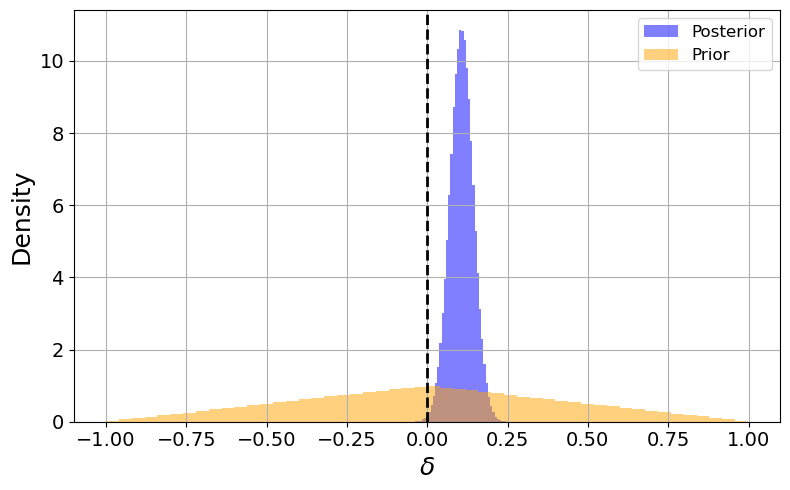

In [6]:
fig, ax = plt.subplots(1, 1, figsize=(8, 5))
ax.hist(samples['delta'].flatten(), bins=50, density=True, alpha=0.5, color='blue', label='Posterior')
ax.hist(samples['delta.prior'].flatten(), bins=50, density=True, alpha=0.5, color='orange', label='Prior')
ax.axvline(0, color='black', linestyle='--', lw=2)
ax.set_xlabel(r'$\delta$', fontsize=18)
ax.set_ylabel('Density', fontsize=18)
ax.legend()
ax.grid(True)
plt.tight_layout()
plt.show()

In order to compute the Savage-Dickey density ratio, we need to obtain the probabilities indicated at the value $\delta=0$ in these histograms. However, reading that with the naked eye from histograms is not particularly accurate. Instead, we shall use _kernel density estimation_. This technique smooths the histogram, but also allows us to query the probability density function that the histogram approximates, at any location of our choice. The function we use is `scipy.stats.gaussian_kde` (see https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.gaussian_kde.html). The term 'Gaussian' has to do with how it smooths the histogram, not with the distributions we use in our model!

2. Determine the PDFs of the posterior and the prior distributions $p(\delta \mid m_1)$ by applying the `gaussian_kde` function on the samples from your JAGS model. Plot these PDFs as a function from the whole possible range of $\delta$ ($\delta \in [-1, 1]$). Add a black dot at the points where the prior and the posterior intersect the vertical line where $\delta=0$, as implied by $m_0$ (you can add such a dot with `ax.plot(..., ..., 'o', color='k')`.

Note: The `p = gaussian_kde` function returns another function. This function is the approximated PDF, based on the samples you used. You can query `p` for example like `p([0.1, 0.2, 0.3])` or `p(np.linspace(0, 1, num=40)`. If you want to query it at one specific number, write: `p([number])` (note the square brackets).

_ANSWER:_

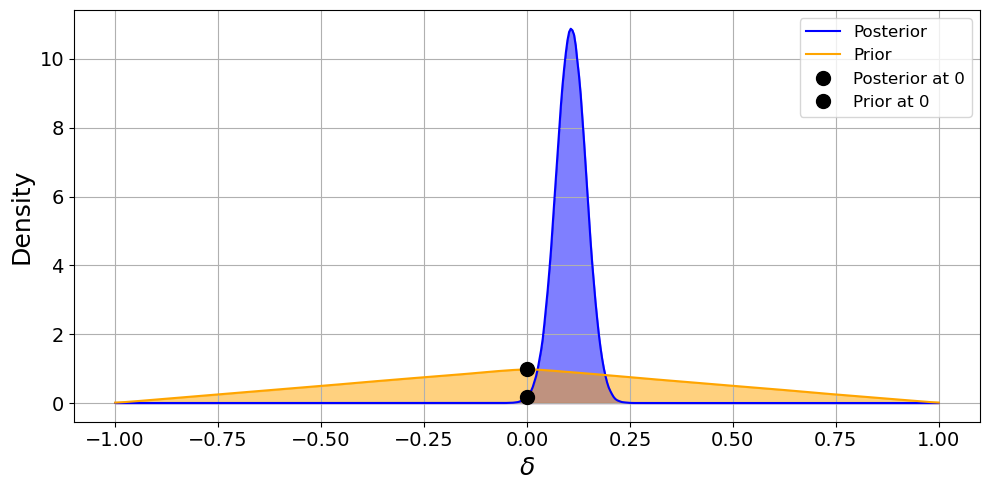

In [7]:
from scipy.stats import gaussian_kde

posterior = gaussian_kde(samples['delta'].flatten())
prior = gaussian_kde(samples['delta.prior'].flatten())


# the resolution of the linspace determines how smooth the plots are
delta_min, delta_max = -1.0, 1.0
delta_range = np.linspace(delta_min, delta_max, num=500)
delta_according_to_m0 = posterior(delta_range)
delta_according_to_m1 = prior(delta_range)

plt.figure(figsize=(10, 5))
ax = plt.gca()
ax.plot(delta_range, delta_according_to_m0, label='Posterior', color='blue')
ax.plot(delta_range, delta_according_to_m1, label='Prior', color='orange')
ax.fill_between(delta_range, delta_according_to_m0, alpha=0.5, color='blue')
ax.fill_between(delta_range, delta_according_to_m1, alpha=0.5, color='orange')
ax.plot(0, posterior([0]), 'o', color='black', markersize=10, label='Posterior at 0')
ax.plot(0, prior([0]), 'o', color='black', markersize=10, label='Prior at 0')
ax.set_xlabel(r'$\delta$', fontsize=18)
ax.set_ylabel('Density', fontsize=18)
ax.legend()
ax.grid(True)
plt.tight_layout()
plt.show()

3. Now use the values at these black dots to compute the Bayes factor of the comparison using the Savage-Dickey approach. Is it close to the value you found with JAGS (let's call it close if they are within 10% of each other) in question 1.2.3?

Remember that both approaches are based on MCMC sampling; they are not exact. If you find results that are roughly within the same ballpark, but further than 10% apart, you might simply want to increase the number of JAGS samples. 

_ANSWER:_ Yes, they are close, i.e. 5.429 (for SD) vs. 5.540 (for previous approach). Therefore, but assume there is substantial evidence that there is a difference.

In [8]:
JAGS_BF = (prior([0])/posterior([0]))[0]
print(f'Bayes factor with Savage-Dickey approach (m1 vs m0): {JAGS_BF:.3f}')
print(f"Bayes factor with previous approach (m1 vs m0): {m1_prob/m0_prob:.3f}")
print(f"Are they the same? (close by 10%) {np.isclose(JAGS_BF, m1_prob/m0_prob, rtol=0.1)}")

Bayes factor with Savage-Dickey approach (m1 vs m0): 5.620
Bayes factor with previous approach (m1 vs m0): 5.875
Are they the same? (close by 10%) True


We saw in the lectures that in order to compute Bayes factors, we need marginal likelihoods, and that these are very sensitive to the prior distribution in a model. That applies here as well. 

Here, we explore what happens to the Bayes factor if we change the prior from extremely weak (uninformative) to extremely strong.

4. First, use the code template below to plot the prior and posterior for $m_1$ for different $q$ values of $a$ and $b$ (for simplicity, we keep $a=b$ here). Note that a `logspace` is used; so we explore values starting at 1, and ending with 1000, in logarithmically spaced steps. Explain what happens to the prior, and what happens to the posterior, as $a$ and $b$ are increased.

_ANSWER:_ Increasing the shared parameters a and b in the Beta(a, b) priors makes the prior belief stronger that both $\theta_F$ and $\theta_S$ are individually close to 0.5. This, in turn, causes the induced prior distribution for the difference, $\delta = \theta_F − \theta_S$, to become sharply peaked around $\delta=0$, significantly increasing the prior density at zero ($p(\delta=0∣m1​)$). The posterior distribution for $\delta$ is a balance between this strong prior pull towards zero and the likelihood information from the data (which suggests $\delta \approx 0.1$). Consequently, as the prior strengthens, the posterior distribution is also pulled closer towards zero, increasing the posterior density at zero ($p(\delta=0∣D,m1​)$) and making the posterior estimate of the difference less sensitive to the data.
 


adapting: iterations 4000 of 4000, elapsed 0:00:00, remaining 0:00:00
sampling: iterations 200000 of 200000, elapsed 0:00:00, remaining 0:00:00
adapting: iterations 4000 of 4000, elapsed 0:00:00, remaining 0:00:00
sampling: iterations 200000 of 200000, elapsed 0:00:00, remaining 0:00:00
adapting: iterations 4000 of 4000, elapsed 0:00:00, remaining 0:00:00
sampling: iterations 200000 of 200000, elapsed 0:00:00, remaining 0:00:00
adapting: iterations 4000 of 4000, elapsed 0:00:00, remaining 0:00:00
sampling: iterations 200000 of 200000, elapsed 0:00:00, remaining 0:00:00
adapting: iterations 4000 of 4000, elapsed 0:00:00, remaining 0:00:00
sampling: iterations 200000 of 200000, elapsed 0:00:00, remaining 0:00:00
adapting: iterations 4000 of 4000, elapsed 0:00:00, remaining 0:00:00
sampling: iterations 200000 of 200000, elapsed 0:00:00, remaining 0:00:00
adapting: iterations 4000 of 4000, elapsed 0:00:00, remaining 0:00:00
sampling: iterations 200000 of 200000, elapsed 0:00:00, remaining 

Text(0.5, 0.98, 'The effect of different prior strengths')

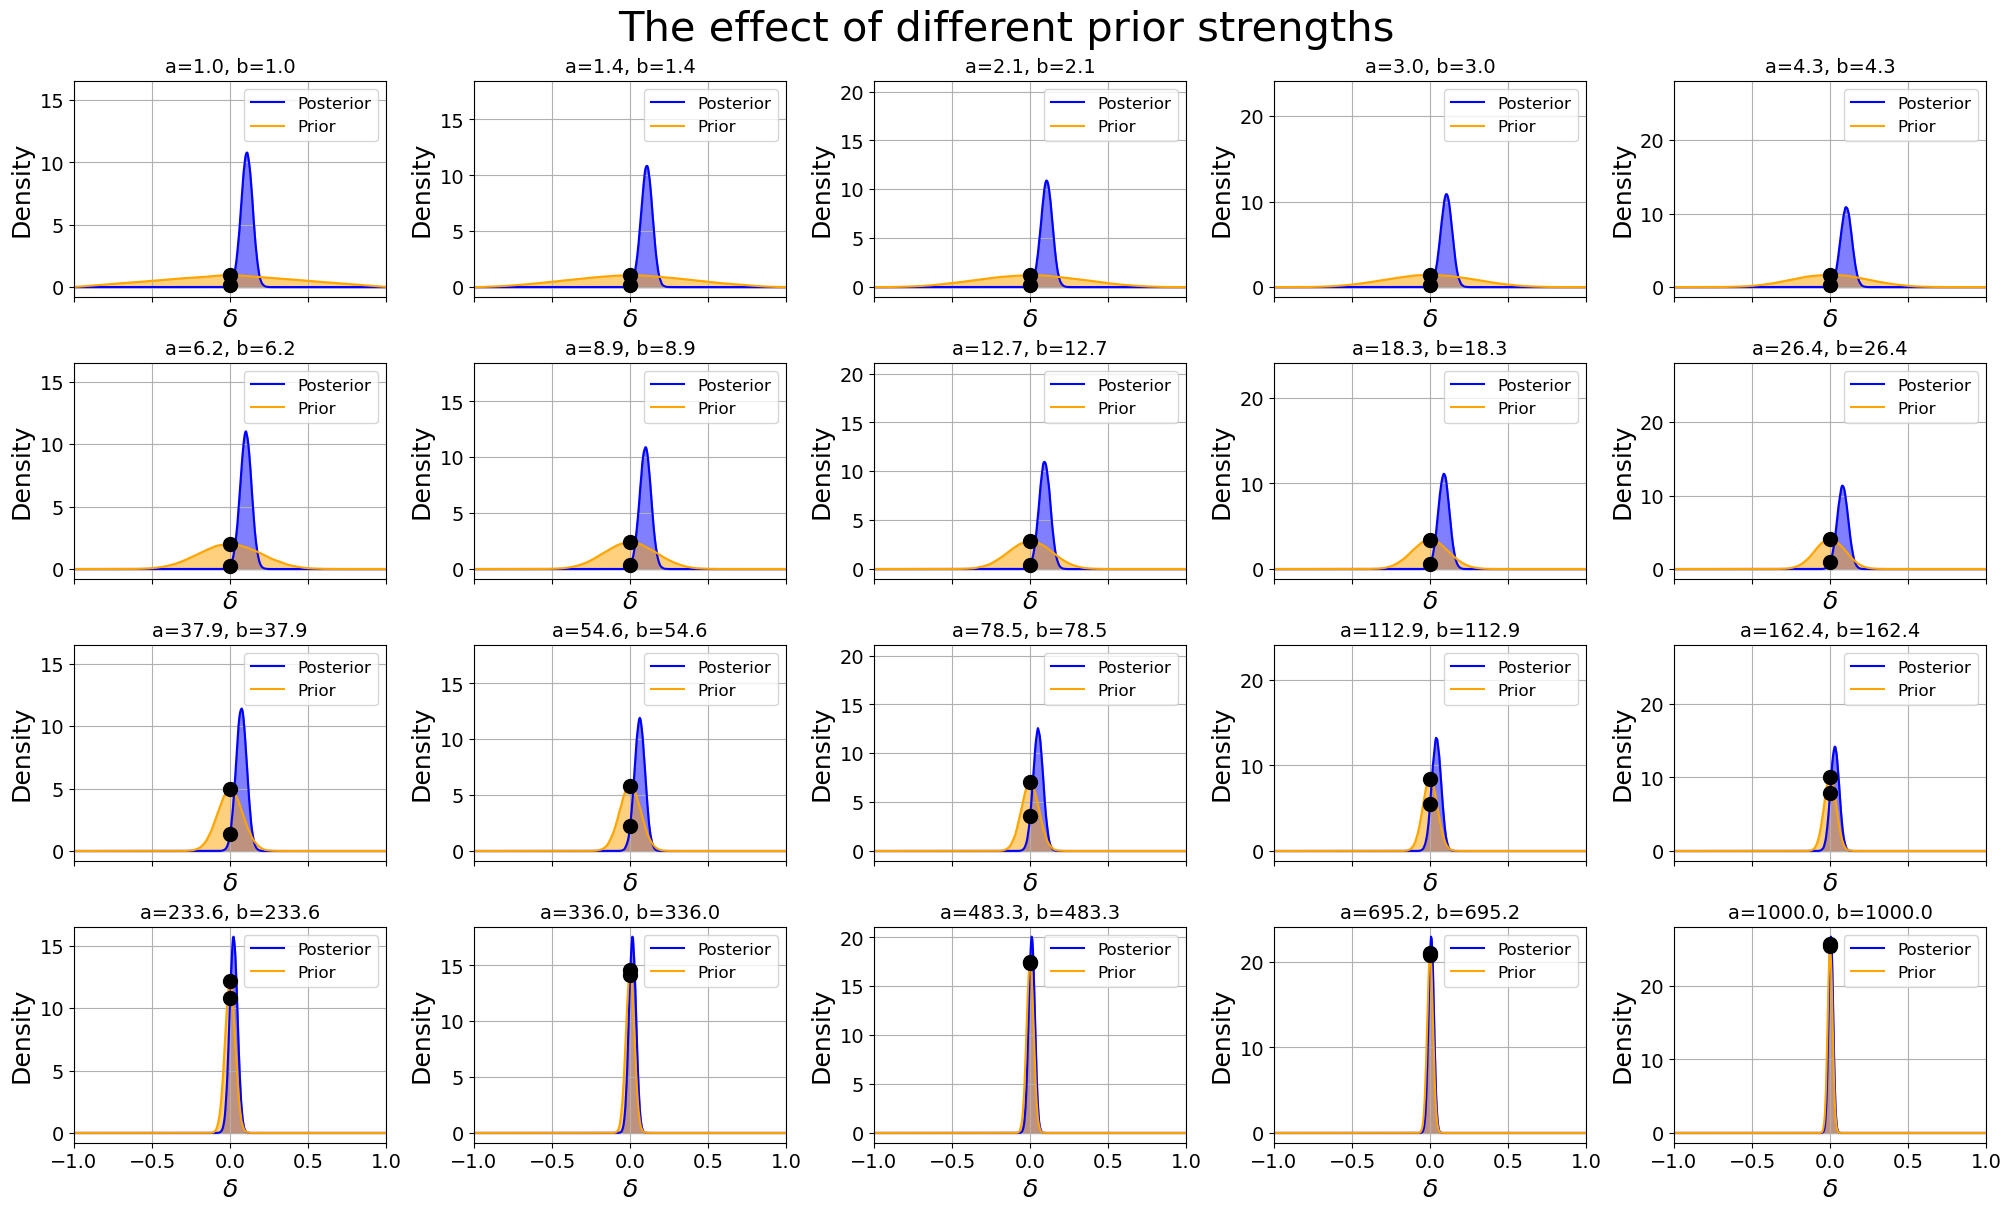

In [9]:
%%time
num_samples = 50000
num_chains = 4

q = 20
as_ = np.logspace(0, 3, num=q)
bs_ = np.logspace(0, 3, num=q)

_, axes = plt.subplots(nrows=4, ncols=5, sharex=True, sharey='col', 
                       constrained_layout=True, figsize=(20, 12))
bfs = []
for i, (a_, b_) in enumerate(zip(as_, bs_)):
    ax = axes.flatten()[i]  # plot in this axis

    data = {
        'N_F': N_F,
        'z_F': z_F,
        'N_S': N_S,
        'z_S': z_S,
        'a': a_,
        'b': b_,
    }
    
    m_ = pj.Model(jags_model, data=data, chains=num_chains)
    samples_ = m_.sample(num_samples, vars=['delta', 'delta.prior', 'theta_F', 'theta_S', 'theta_F.prior', 'theta_S.prior'])
    posterior_ = gaussian_kde(samples_['delta'].flatten())
    prior_ = gaussian_kde(samples_['delta.prior'].flatten())
    
    # do the plotting here:
    delta_according_to_m0_ = posterior_(delta_range)
    delta_according_to_m1_ = prior_(delta_range)
    bfs.append(prior_([0])/posterior_([0])[0])
    ax.plot(delta_range, delta_according_to_m0_, label='Posterior', color='blue')
    ax.plot(delta_range, delta_according_to_m1_, label='Prior', color='orange')
    ax.fill_between(delta_range, delta_according_to_m0_, alpha=0.5, color='blue')
    ax.fill_between(delta_range, delta_according_to_m1_, alpha=0.5, color='orange')
    ax.plot(0, posterior_([0]), 'o', color='black', markersize=10)
    ax.plot(0, prior_([0]), 'o', color='black', markersize=10)
    ax.set_title(f'a={a_:.1f}, b={b_:.1f}', fontsize=14)
    ax.set_xlabel(r'$\delta$', fontsize=18)
    ax.set_ylabel('Density', fontsize=18)
    ax.grid(True)
    ax.legend()
    ax.set_xlim(delta_min, delta_max)
plt.suptitle('The effect of different prior strengths')

5. Now make a single figure in which you plot the Bayes factor of this model comparison as a function of $a$ ($=b$) on the x-axis. You should see an initial increase in the Bayes factor, but then the Bayes factor decays to some asymptotic value. What is this value, and why does it make sense that the Bayes factor converges here, as we increase the strength of the prior? What does this mean for the model comparison?

_ANSWER_: As the prior strength increases (larger $a=b$), the `Beta(a,b)` priors for $\theta_F$ and $\theta_S$ become extremely concentrated around 0.5. This forces the induced prior for the difference, $p(\delta|m_1)$, to become essentially a spike at $\delta=0$. The posterior distribution $p(\delta|D, m_1) \propto p(D|\delta, m_1)p(\delta|m_1)$ is also forced to become a spike at $\delta=0$, completely dsiregarding the information from the data which suggested $\delta \approx 0.1$.
    
The Savage-Dickey Bayes Factor is $BF_{10} = \frac{p(\delta=0 \mid m_1)}{p(\delta=0 \mid D, m_1)}$. In the limit of an infinitely strong prior at $\delta=0$, both the prior density and the posterior density at $\delta=0$ approach infinity (representing delta functions). However, their *ratio* converges to 1. Intuitively, if the prior for $m_1$ completely forces $\delta=0$, then model $m_1$ becomes indistinguishable from model $m_0$ (which *defines* $\delta=0$). The evidence for two identical models must be equal, so $p(D|m_1) \to p(D|m_0)$, and thus $BF_{10} = p(D|m_1)/p(D|m_0) \to 1$. 

This convergence to $BF_{10}=1$ signifies that an extremely strong prior belief that $\delta=0$ makes the data irrelevant for distinguishing between $m_0$ and $m_1$. The model comparison becomes entirely determined by the overwhelming prior, effectively stating there is no evidence to prefer one model over the other *because the prior for $m_1$ has been forced to be identical to $m_0$*. This means for bayeisna model comparison that we should investigate sensitivity to a variable prior, and guarantee that our model comparison result is not a fluke from an ill-informed prior, but rather from a robust reaction of the posterior to the data across different priors.



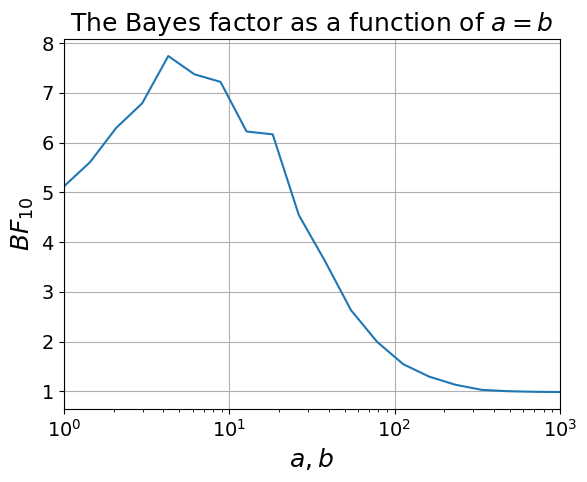

In [10]:
plt.figure()
ax = plt.gca()
ax.plot(as_, bfs)  # `bfs` is what you have to determine
ax.set_xlabel(r'$a, b$')
ax.set_ylabel(r'$BF_{10}$')
ax.set_xlim([1, 1000]);
ax.set_title('The Bayes factor as a function of $a=b$')
ax.grid(True)
ax.set_xscale('log')

---
# 2. Time for a drink

After all this analysis for DentoCare, it is time to set our sights on a more enjoyable topic: booze. In this part of the exercise we'll study the quality of red wine ($y$), as a function of its chemical properties ($x$), such as pH, alcohol content, citric acid levels, and so on.

Our data set consists of $N=1599$ wines, and for each we have observed $p=11$ of these properties.

We'll try to figure out, using Bayesian testing, which of these properties are important for predicting wine quality, and which are not. To do so, we make use of the generalized linear model again, and describe our model as:

$$
    \begin{align}
        \beta_j &\sim \mathcal{N}(\beta_j \mid \mu_{\beta}, \sigma_{\beta}) && j=0, \ldots, p\\
        y_i \mid \mathbf{x}_i, \mathbf{\beta} &\sim \mathcal{N}(y_i \mid \beta_0 + \mathbf{x}_i^\top \mathbf{\beta}, \sigma_y) && i =1,\ldots, N\enspace,
    \end{align}
$$

Importantly, the quality of the wine is a linear combination of the chemical properties and the coefficients $\mathbf{\beta}$. Note that $\beta$ is a vector of $p+1$ elements, as it also contains the intercept $\beta_0$.

The code below loads the data, and makes a figure of the distribution of the feature and outcome values.

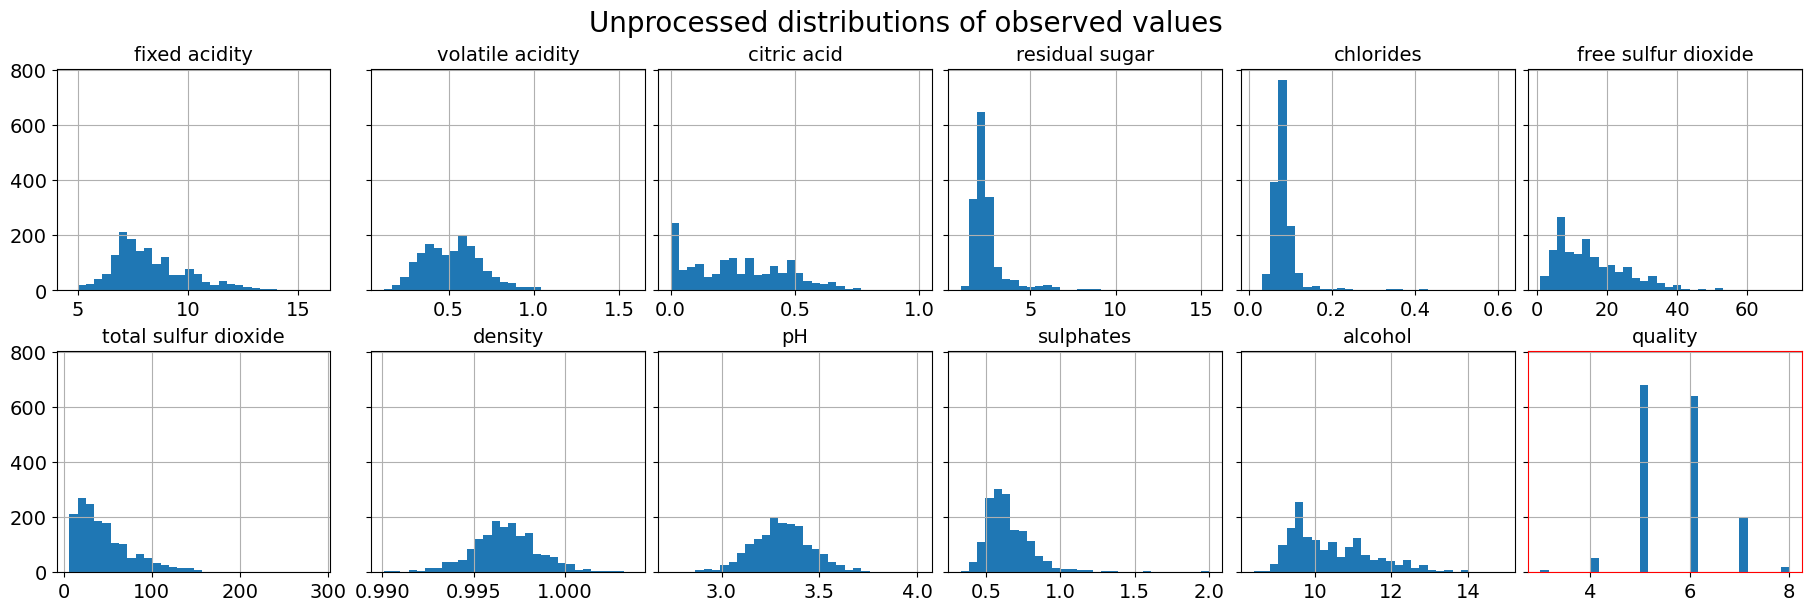

In [67]:
import pandas as pd
filename = 'winequality-red.csv'

df = pd.read_csv(filename, sep=';')
feature_names = df.columns
x = df.values[:, 0:-1]
y = df.values[:, -1]
n, p = x.shape

_, axes = plt.subplots(nrows=2, ncols=6, sharey=True, constrained_layout=True, 
                       figsize=(18, 6))

for i, ax in enumerate(axes.flatten()):
    if i < p:
        ax.hist(x[:, i], bins=30)
    else:
        ax.hist(y, bins=30)
    ax.grid(True)
    ax.set_title(feature_names[i], fontsize=14)

ax = axes.flatten()[-1]
for _, spine in ax.spines.items():
    spine.set_color('red')    
    spine.set_color('red')

plt.suptitle('Unprocessed distributions of observed values', fontsize=20);

**Practical note**: Notice how the different features have very different _ranges_ of possible values. For instance, the citric acid ranges from 0 to 0.7 (ish), whereas the alcohol percentage is in the range 9--14. This makes it hard to compare the regression coefficients $\beta$ with each other, as these coefficients will have to adjust to the scales of the corresponding predictor. For example, suppose the pH increases from 0.5 to 0.6, and let $\beta_{\text{pH}}=3.2$. This means a change in $y$ of $3.2(0.6-0.5) = 0.32$. If $\beta_{\text{alcohol}}=3.2$, and alcohol increases from 12% to 13%, then the change in $y$ is $3.2(13-12)=3.2$. A much bigger change in $y$, even though relatively speaking the predictors didn't change that much differently.

The standard data science approach to address this, is to standardize our input, so that every predictor has mean 0 and standard deviation 1. We shall adopt this approach here. 

1. Preprocess the features $x$ by, for each column of $x$, subtracting the mean $\mu(x)$ and dividing by the standard deviation $\sigma(x)$. Make another figure like the one above, but show the scaled versions of $x$. Make sure that indeed the mean of each histogram is now at 0. Do the same for the last observed value, the target wine quality $y$.

_ANSWER:_

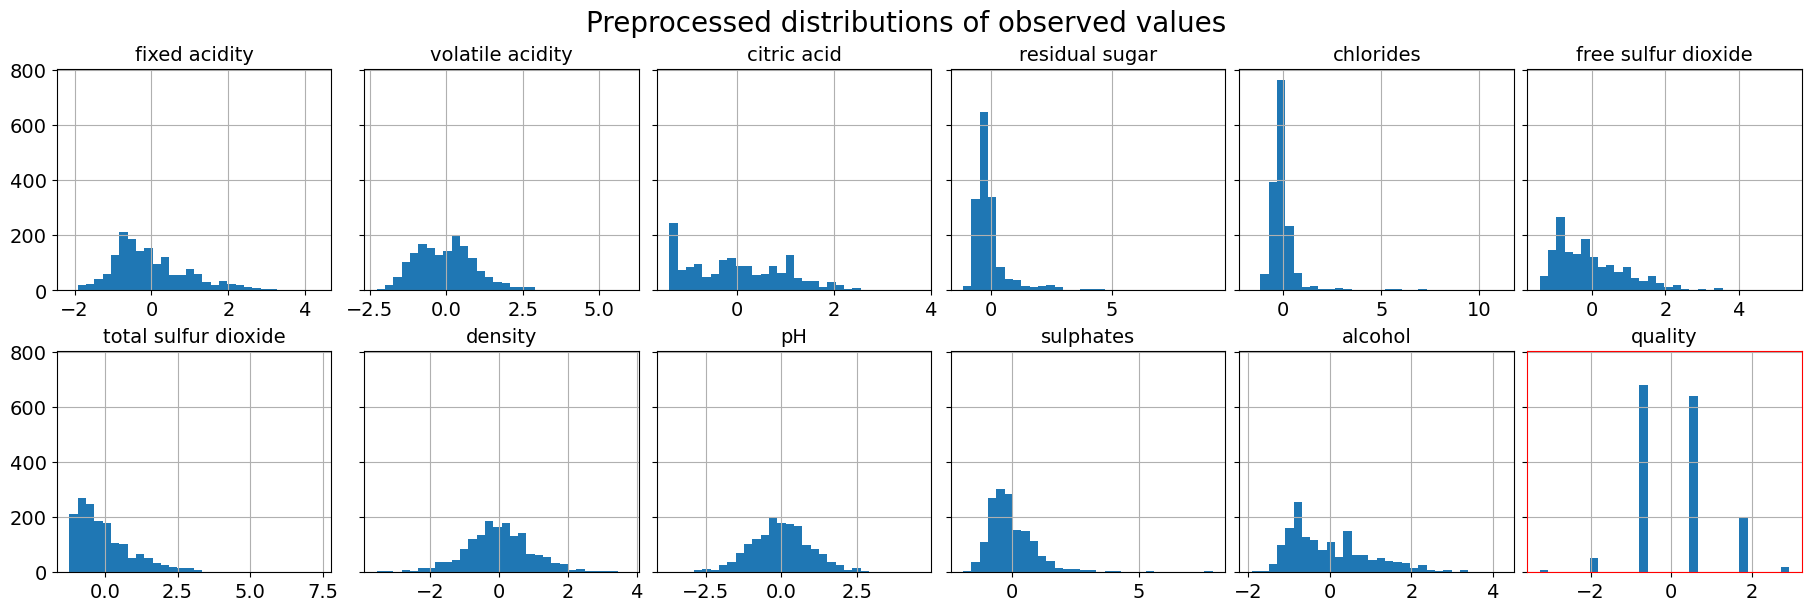

In [68]:
x = df.values[:, 0:-1]
x = (x - x.mean(axis=0)) / x.std(axis=0) # preprocess
y = df.values[:, -1]
y = (y - y.mean(axis=0)) / y.std(axis=0) # preprocess
n, p = x.shape

_, axes = plt.subplots(nrows=2, ncols=6, sharey=True, constrained_layout=True, 
                       figsize=(18, 6))

for i, ax in enumerate(axes.flatten()):
    if i < p:
        ax.hist(x[:, i], bins=30)
    else:
        ax.hist(y, bins=30)
    ax.grid(True)

    ax.set_title(feature_names[i], fontsize=14)


ax = axes.flatten()[-1]
for _, spine in ax.spines.items():
    spine.set_color('red')    
    spine.set_color('red')

plt.suptitle('Preprocessed distributions of observed values', fontsize=20);

Now we can start constructing a Bayesian multiple regression model. 

**Practical note**: Clearly $y$ does not follow a Gaussian distribution, even after our transformation. For simplicity, we shall stick to Gaussians, but if you're using this exercise to buy your next wine, be warned that better modelling choices are available.

You have already done part of this in Large Assignment 1, and you are free to re-use your (**own!**) code from that assignment -- there is no need to reinvent the wheel if you are happy with that solution. However, we have several more predictors now though, so a linear algebra expression such as `inprod(...)` will be needed to make robust code.

2. Implement a Bayesian multiple linear regression model that predicts wine quality from the observed features, with the prior and likelihood as mentioned here. Make a figure showing for each of the 11 predictors $\beta_j, j=1, \ldots, p$ as well as intercept $\beta_0$ the approximate posterior distribution. Be sure to use the `inprod(...)` approach.


_ANSWER:_



In [84]:
%%time
jags_model = '''
model{      
  # Prior 
  b0 ~ dnorm(0, 1e-3)
  
  sigma ~ dgamma(0.001, 0.001)
  tau <- pow(sigma, -2)
  for (j in 1:p) {
    b[j] ~ dnorm(0, 1e-3)
  }
  
  # Likelihood
  for (i in 1:n) {
    mu[i] <- b0 + inprod(b[], x[i, ])
    y[i] ~ dnorm(mu[i], tau)
  }
  
}
'''

data = {
  'x' : x,
  'y' : y,
  'n' : n,
  'p' : p
}

num_samples = 20000
num_chains = 4
m = pj.Model(jags_model, data=data, chains=num_chains)

samples = m.sample(num_samples, vars=['b0', 'b', 'sigma'])
print('Sampling complete.')

adapting: iterations 3720 of 4000, elapsed 0:00:05, remaining 0:00:00
adapting: iterations 4000 of 4000, elapsed 0:00:06, remaining 0:00:00
sampling: iterations 3260 of 80000, elapsed 0:00:06, remaining 0:02:24
sampling: iterations 5932 of 80000, elapsed 0:00:11, remaining 0:02:22
sampling: iterations 8536 of 80000, elapsed 0:00:18, remaining 0:02:29
sampling: iterations 13392 of 80000, elapsed 0:00:27, remaining 0:02:13
sampling: iterations 18484 of 80000, elapsed 0:00:36, remaining 0:01:59
sampling: iterations 23708 of 80000, elapsed 0:00:45, remaining 0:01:46
sampling: iterations 29020 of 80000, elapsed 0:00:55, remaining 0:01:36
sampling: iterations 34348 of 80000, elapsed 0:01:03, remaining 0:01:24
sampling: iterations 39804 of 80000, elapsed 0:01:12, remaining 0:01:13
sampling: iterations 42572 of 80000, elapsed 0:01:17, remaining 0:01:08
sampling: iterations 48128 of 80000, elapsed 0:01:26, remaining 0:00:57
sampling: iterations 50920 of 80000, elapsed 0:01:32, remaining 0:00:52

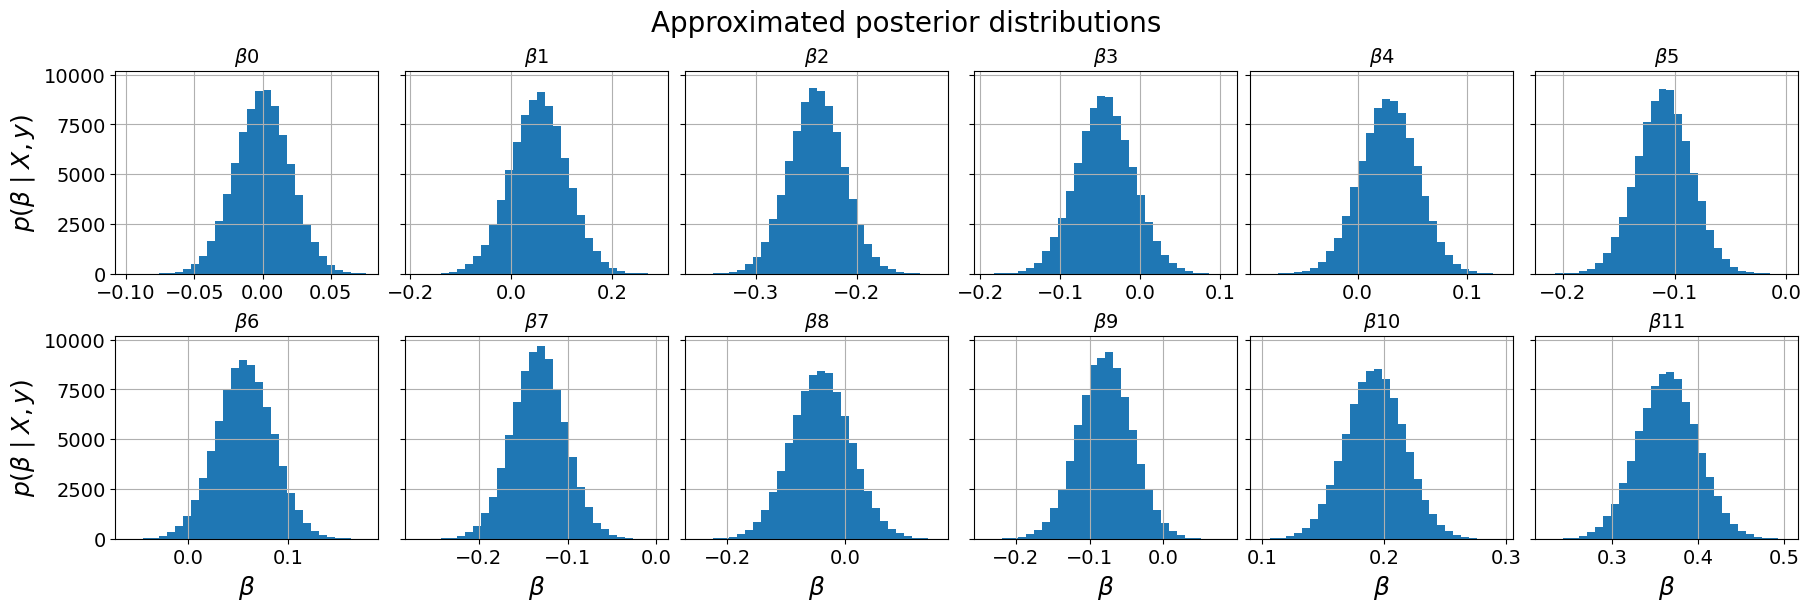

In [85]:
def get_hdi(s, intv=0.95):
    s_sorted = np.sort(s)
    n = len(s_sorted)
    num_samples_in_hdi = int(n * intv)
    num_possible_hdis = n - num_samples_in_hdi 

    bottom_idx = np.arange(0, num_possible_hdis)
    top_idx = bottom_idx + num_samples_in_hdi

    assert all(top_idx - bottom_idx == num_samples_in_hdi)

    s_bottom = s_sorted[bottom_idx]
    s_top = s_sorted[top_idx]
    diffs = s_top - s_bottom
    min_diff_idx = np.argmin(diffs)

    s_bottom_hdi = s_bottom[min_diff_idx]
    s_top_hdi = s_top[min_diff_idx]
    
    return s_bottom_hdi, s_top_hdi

b = samples['b'].reshape(p, num_samples * num_chains)
b0 = samples['b0'].reshape(num_samples * num_chains)

_, axes = plt.subplots(nrows=2, ncols=6, sharey=True, constrained_layout=True, 
                       figsize=(18, 6))

for i, ax in enumerate(axes.flatten()):
    if i == 0:
        ax.hist(b0, bins=30)
    else:
        ax.hist(b[i-1, :], bins=30)


    ax.grid(True)
    ax.set_title(rf"$\beta${i}", fontsize=14)    

for ax in axes[1, :]:
    ax.set_xlabel(r'$\beta$')
for ax in axes[:, 0]:
    ax.set_ylabel(r'$p(\beta \mid X, y)$')

plt.suptitle('Approximated posterior distributions', fontsize=20);

The question of 'which feature is important in predicting wine quality?' is also a form of model comparison / hypothesis testing. In a way, we are comparing $2^{11}$ models here -- because each of the $p=11$ predictors can either be important or not.

3. Use your posterior distributions to determine the 95% HDI for each of the predictors, and make a new figure where you show this interval on top of your posterior distributions. You can use, for example, the `ax.axvspan(..., alpha=0.2)` code. In addition, include a vertical line (with a clearly distinguishable color/linestyle) that represents for each predictor the null hypothesis that says this predictor is _not_ important (think about that this means for the corresponding $\beta$). According to this analysis, which features are important? Explain how you got to your answer.

_ANSWER:_ A coefficient of zero implies that the corresponding predictor has no linear association with the outcome variable, *after accounting for the other predictors in the model*.

The 95% Highest Density Interval (HDI) represents the range of values for the coefficient that are most plausible, given the data and the model. It contains 95% of the posterior probability mass within the narrowest possible interval.

The decision rule derived from this is:

1.  **If the 95% HDI for $\beta_i$ *contains* the value 0:** This indicates that zero is among the most credible values for the coefficient. Therefore, the data does not provide strong evidence to reject the null hypothesis that $\beta_i = 0$. With this we can conclude that, the predictor is **not statistically significant** at this credibility level (i.e. 95%).

2.  **If the 95% HDI for $\beta_i$ *does not* contain the value 0:** This means that zero is not among the most credible values for the coefficient. The data provides strong evidence against the null hypothesis ($\beta_i = 0$). We conclude that the predictor **is statistically significant** at this credibility level.

If we apply this to our scenario:

*   The 95% HDIs for $\beta_1$, $\beta_3$, $\beta_4$, and $\beta_8$ **do contain 0**. Thus, according to this analysis, the predictors corresponding to these coefficients (e.g., feature 1, feature 3, feature 4, feature 8) are **not statistically significant**.
*   The 95% HDIs for the remaining coefficients ($\beta_2, \beta_5, \beta_6, \beta_7, \beta_9, \beta_{10}, \beta_{11}$) **do not contain 0**. Thus, these predictors are considered **statistically significant**, suggesting they play an important role in predicting wine quality.
*   For the intercept, $\beta_0$, the interpretation is slightly different. Its HDI containing 0 suggests that it's plausible the average wine quality score is zero when all other features are zero (considering that we centered the data earlier, this is expected).


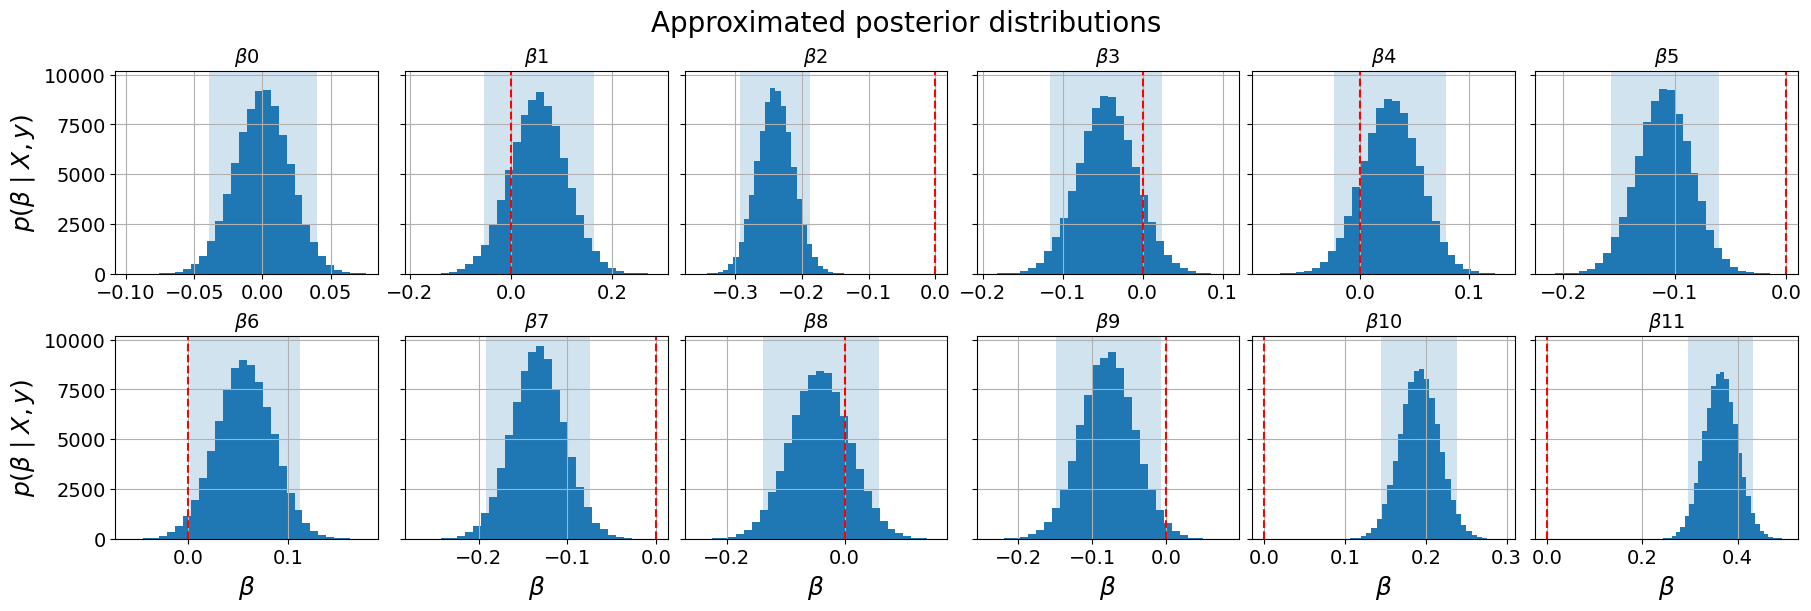

In [86]:
_, axes = plt.subplots(nrows=2, ncols=6, sharey=True, constrained_layout=True, 
                       figsize=(18, 6))

for i, ax in enumerate(axes.flatten()):
    if i == 0:
        hdi_bottom, hdi_top = get_hdi(b0)
        ax.hist(b0, bins=30)
        ax.axvspan(hdi_bottom, hdi_top, alpha=0.2)
    else:
        hdi_bottom, hdi_top = get_hdi(b[i-1, :])
        ax.hist(b[i-1, :], bins=30)
        ax.axvspan(hdi_bottom, hdi_top, alpha=0.2)
        ax.axvline(0, color='red', linestyle='--')

    ax.grid(True)
    ax.set_title(rf"$\beta${i}", fontsize=14)    

for ax in axes[1, :]:
    ax.set_xlabel(r'$\beta$')
for ax in axes[:, 0]:
    ax.set_ylabel(r'$p(\beta \mid X, y)$')

plt.suptitle('Approximated posterior distributions', fontsize=20);

Your analysis has told us which features are important in predicting wine quality. However, a critical remark is that our choice of prior might affect our results.

4. Verify the robustness of your conclusion by changing the scale (=variance/standard deviation/precision) of the prior distribution on the regression coefficients. Do you find quantitatively different results (e.g., different conclusions)?

_ANSWER:_ In my previous analysis, some HDIs of coefficients were bordering to the 0.0 line. This means that be increasing the scale (distributing the HDI more) of the priors for each coefficient will lead to some HDI now crossing the zero line. In other words, some features now become important, if they were close to being unimportant before. For example, $\beta_6$ and $\beta_9$ are such candidates, that depending on how we tune the scale of the priors, they become "unimportant". However, the results are quite robust, in the sense that we'd have to increase the scale of the priors quite a lot for this to happen. 